In [23]:
# Handle the situation when 
# ( i ) the yeild must be zero when the area is zero
# ( ii ) the yeild must be zero when the production is zero

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("crop_yield.csv")

In [3]:
df.sample(3)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19146,Sugarcane,2010,Whole Year,Arunachal Pradesh,1508.0,28974,2574.1,250493.88,361.92,20.631111
11184,Turmeric,2009,Whole Year,Manipur,1295.0,15410,992.5,201786.90,220.15,11.807778
4399,Sugarcane,2014,Whole Year,Tamil Nadu,263066.0,28092784,911.3,39712443.36,86811.78,99.260333


In [4]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [5]:
df = df.drop(columns=["Yield"])

In [6]:
df.sample(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide
16321,Wheat,2018,Rabi,Maharashtra,834423.25,1249407,1387.400000,1.353435e+08,292048.1375
15079,Potato,2016,Kharif,Mizoram,106.00,437,2626.800000,1.624450e+04,37.1000
15185,Safflower,2016,Kharif,Telangana,5.00,5,942.600000,7.662500e+02,1.7500
9406,Jowar,2005,Kharif,Haryana,89191.00,26000,516.900000,1.069578e+07,18730.1100
17340,Small millets,2020,Kharif,Uttarakhand,44769.00,65289,1313.947826,8.667726e+06,16564.5300


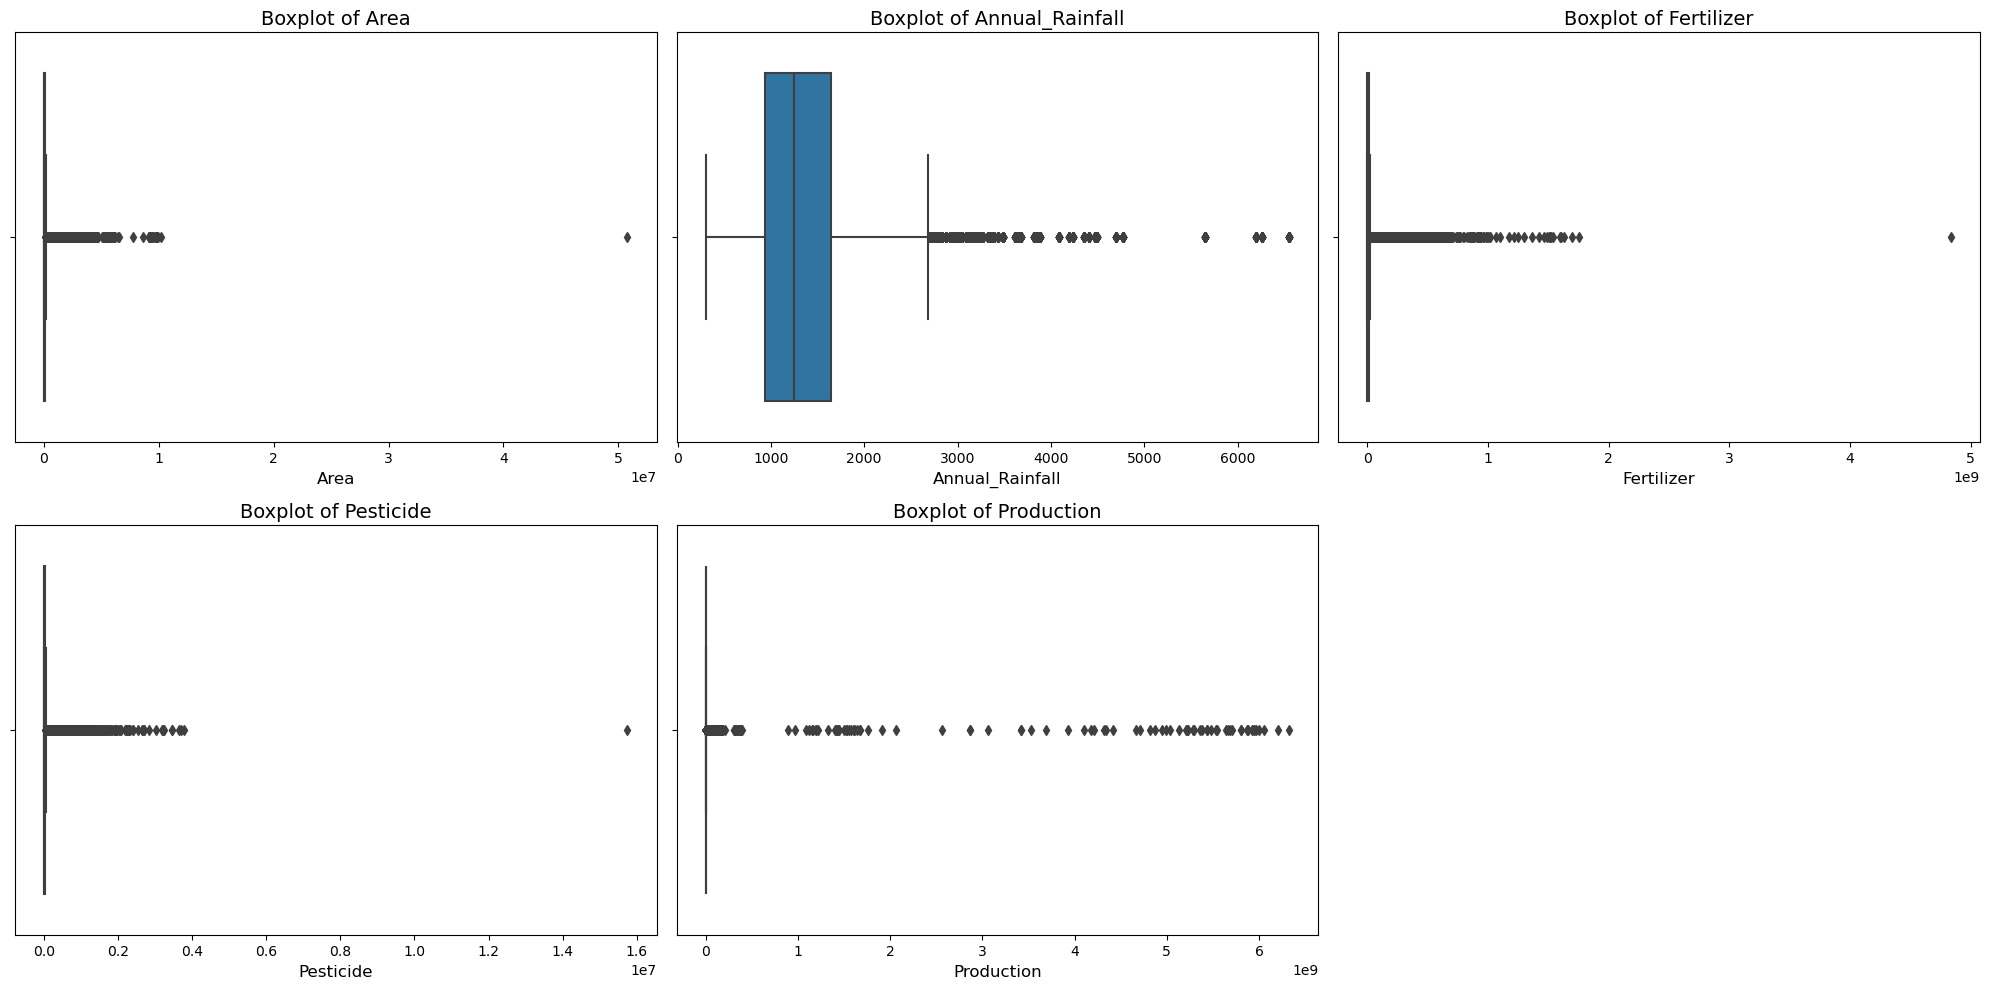

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features
features = ['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Production']

# Create subplots: 2 rows × 3 columns with increased size
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()  # Flatten to access via a single loop

# Loop through features and plot boxplots
for i, col in enumerate(features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)

# Hide any unused subplot if features < total subplots
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [19]:
def handle_outliers(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.80)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q1 + 1.5*IQR

        df_cleaned[col] = np.where(df_cleaned[col]> upper_bound , upper_bound,
                                  np.where(df_cleaned[col]<lower_bound , lower_bound, df_cleaned[col]))

    return df_cleaned  

df  = handle_outliers(df, features)

In [20]:
for col in features:
    print(df[col].skew())

1.1728076394428244
0.38530958128960296
1.1727627207668934
1.182296322791032
1.2257068192284868


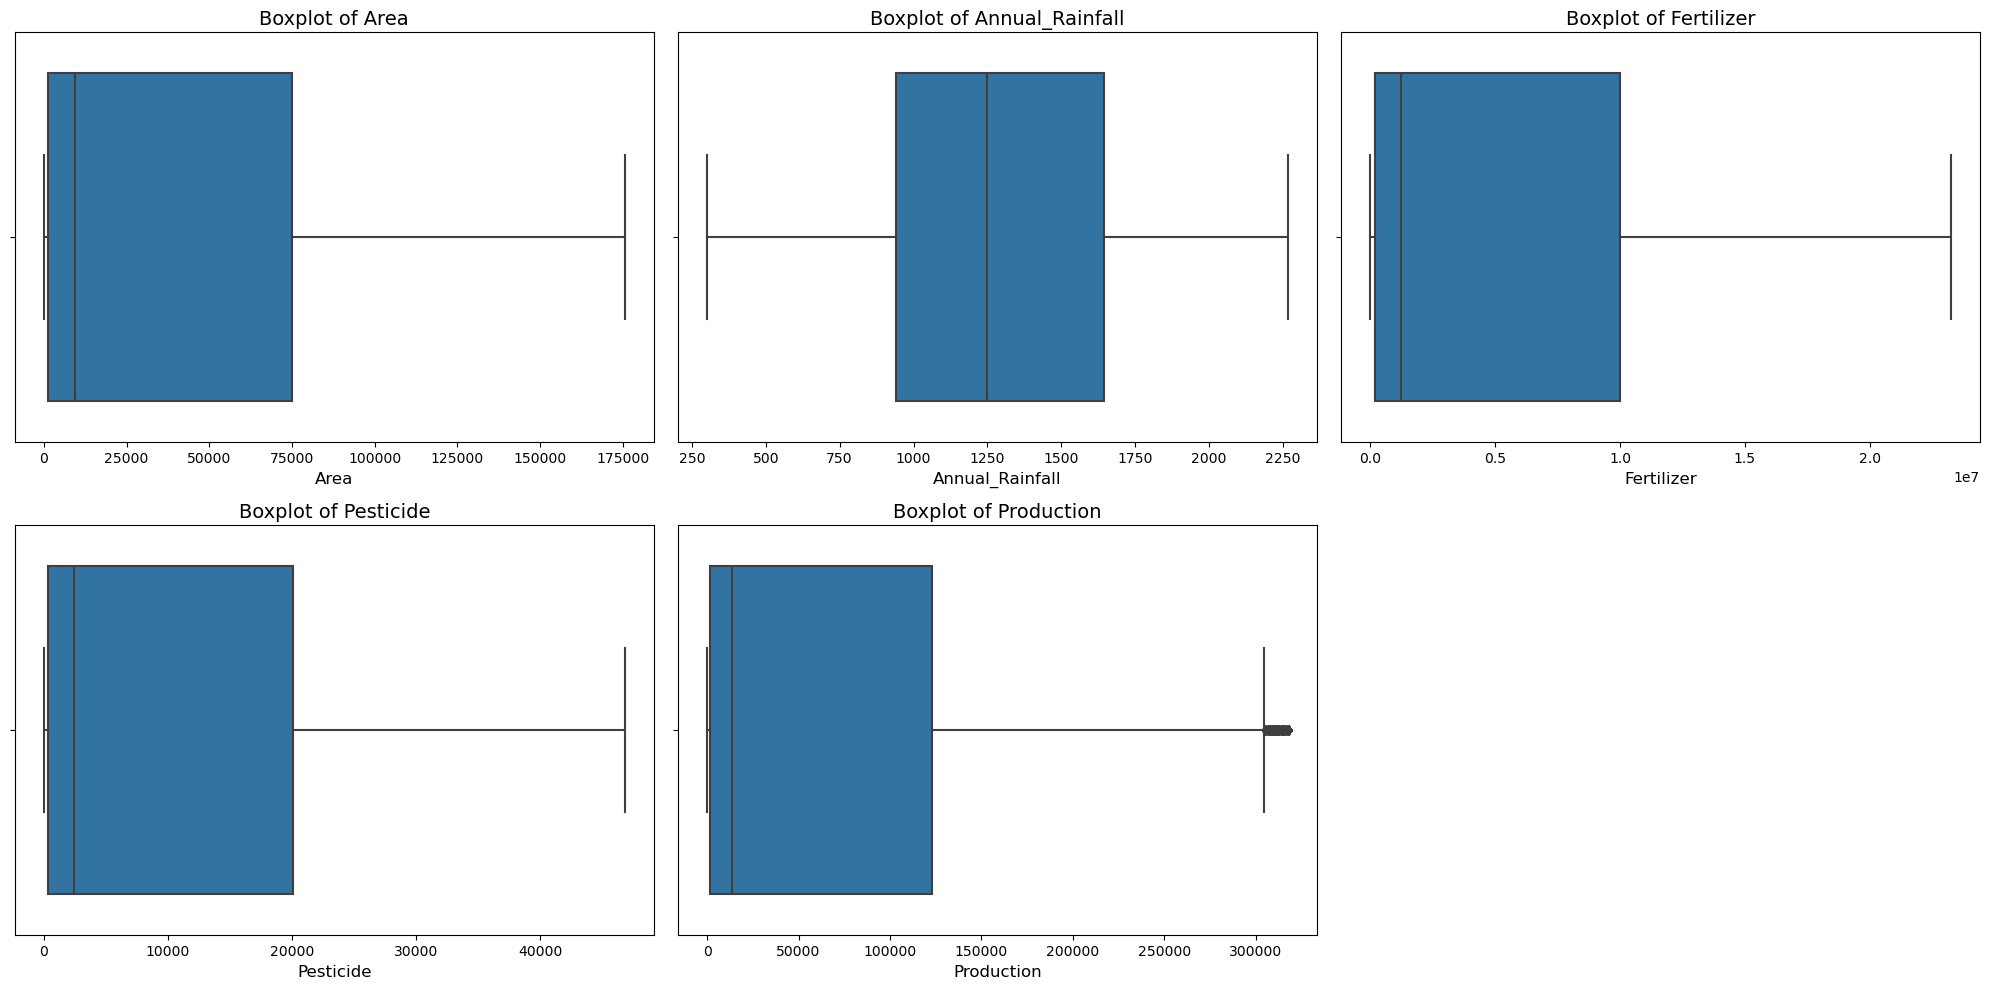

In [21]:
# Create subplots: 2 rows × 3 columns with increased size
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()  # Flatten to access via a single loop

# Loop through features and plot boxplots
for i, col in enumerate(features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)

# Hide any unused subplot if features < total subplots
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

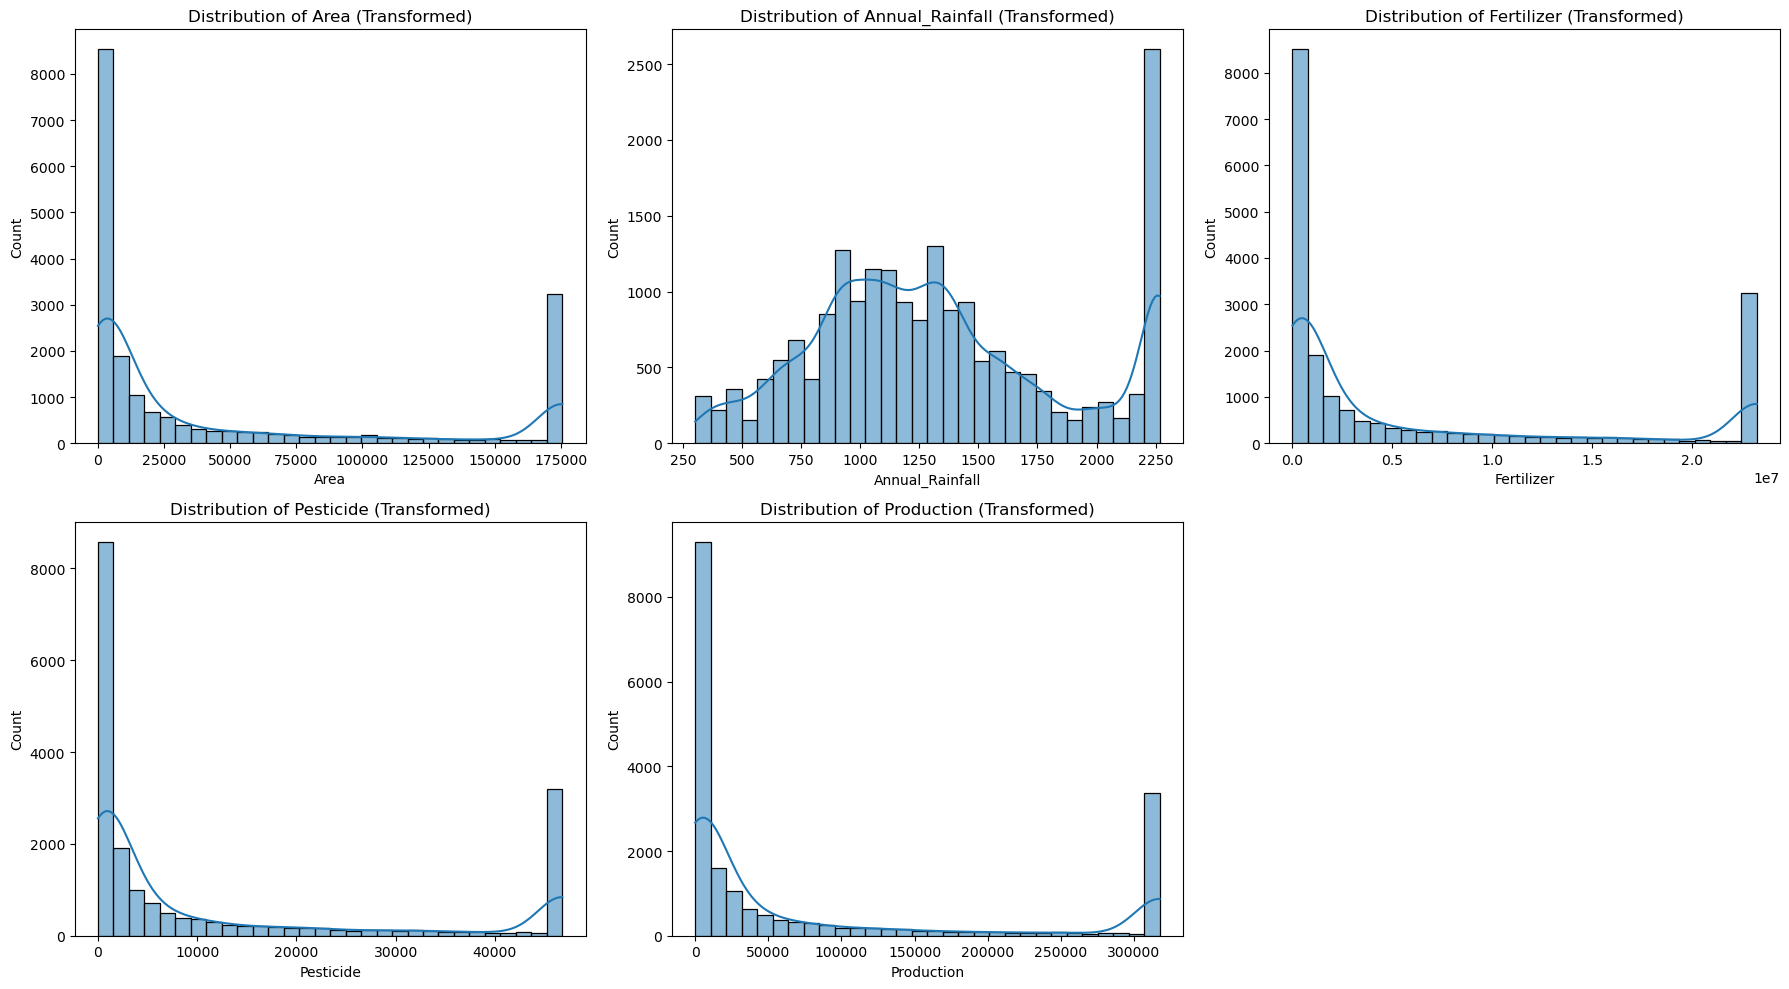

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms to see effect
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col} (Transformed)')

# Remove extra subplot if any
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [24]:
# Apply log1p transformation
for col in features:
    df[col] = np.log1p(df[col])

C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

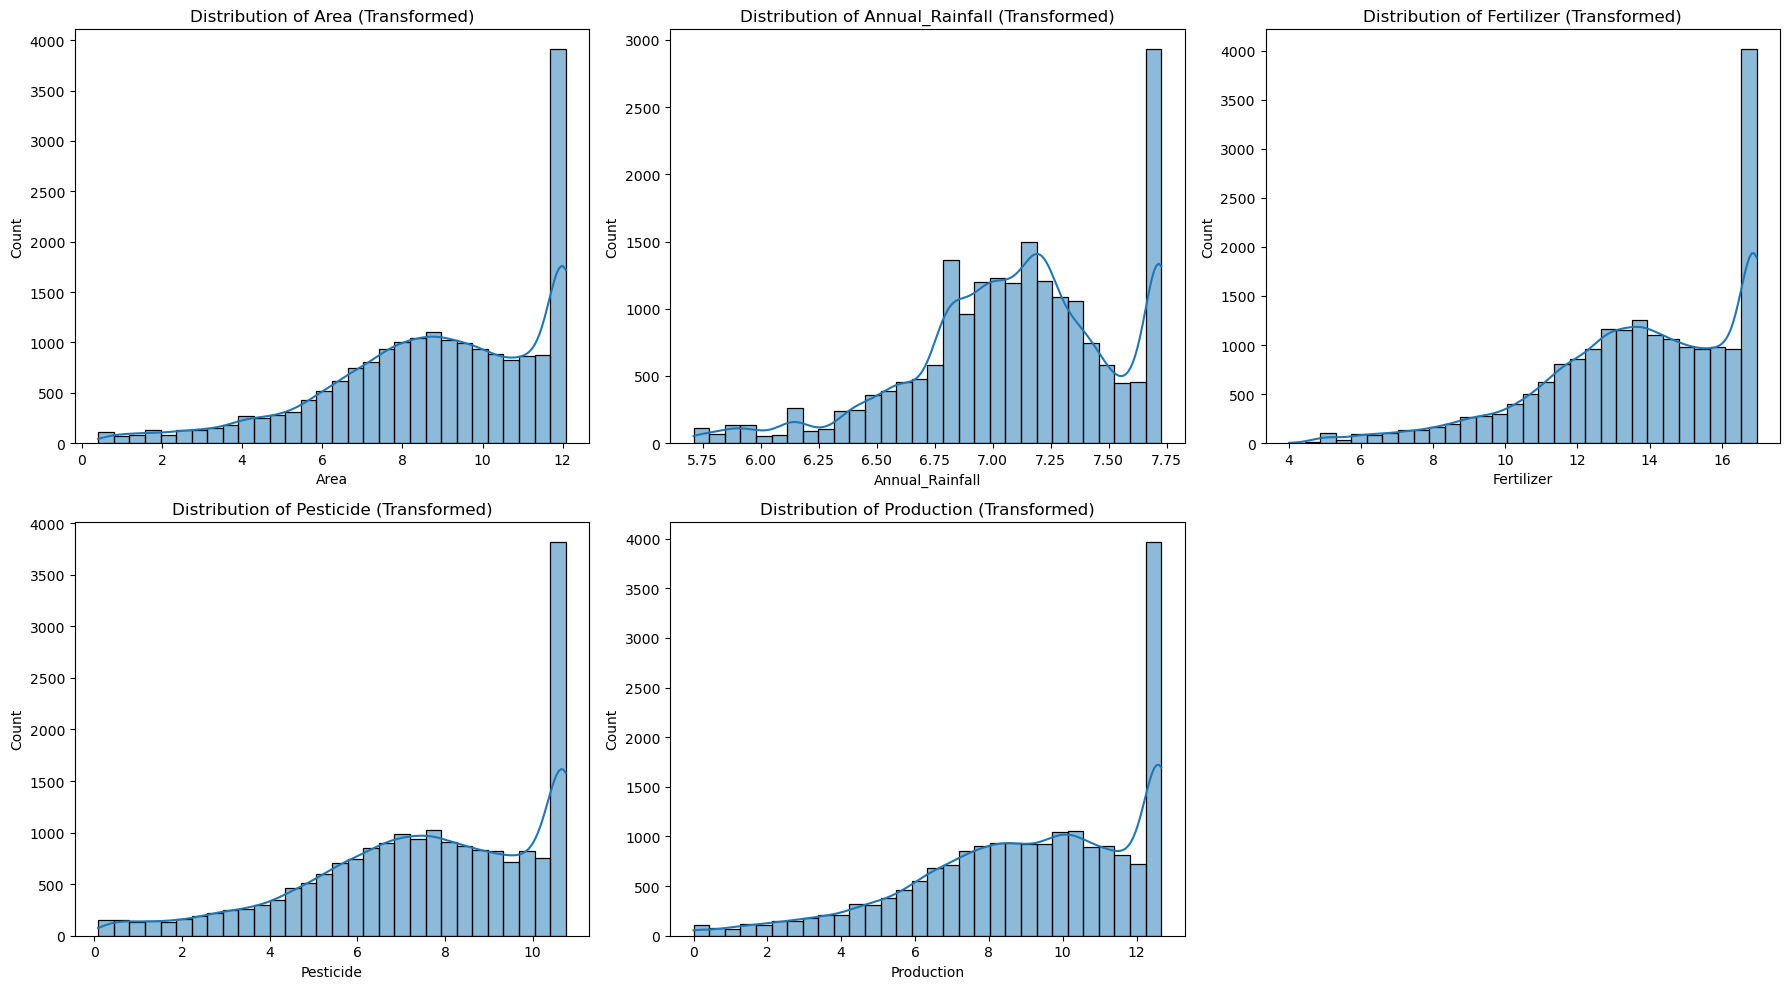

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms to see effect
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col} (Transformed)')

# Remove extra subplot if any
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [26]:
import optuna
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [27]:
X = df.drop("Production",axis=1)
y = df["Production"]

In [28]:
X

,Crop,Crop_Year,Season,State,Area,Annual_Rainfall,Fertilizer,Pesticide
0,Arecanut,1997,Whole Year,Assam,11.209317,7.626765,15.764969,10.038164
1,Arhar/Tur,1997,Kharif,Assam,8.800566,7.626765,13.356082,7.629718
2,Castor seed,1997,Kharif,Assam,6.680855,7.626765,11.235277,5.512461
3,Coconut,1997,Whole Year,Assam,9.886189,7.626765,14.441803,8.715119
4,Cotton(lint),1997,Kharif,Assam,7.461640,7.626765,12.016736,6.291736
...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,8.294300,7.312553,12.887150,7.057037
19685,Wheat,1998,Rabi,Nagaland,6.908755,7.312553,11.500863,5.673323
19686,Maize,1997,Kharif,Jammu and Kashmir,12.075896,7.213179,16.961551,10.753347
19687,Rice,1997,Kharif,Jammu and Kashmir,12.075896,7.213179,16.961551,10.753347


In [29]:
cat_features = ["Crop","Season","State"]

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 400, 700),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-2, 10.0, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "random_strength": trial.suggest_float("random_strength", 1e-2, 10.0),
        "verbose": 0,
    }
    model=CatBoostRegressor(**params)
    model.fit(X_train, y_train,cat_features=cat_features)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val,y_pred)
    return np.sqrt(mse)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

[I 2025-04-06 12:13:17,495] A new study created in memory with name: no-name-48683529-c89a-4044-9904-4a88e9549e28
[I 2025-04-06 12:13:51,532] Trial 0 finished with value: 0.4221028908923194 and parameters: {'iterations': 619, 'learning_rate': 0.17668310451841404, 'depth': 8, 'l2_leaf_reg': 0.3483289670237233, 'bagging_temperature': 0.309300693505311, 'border_count': 132, 'random_strength': 0.5761427163114557}. Best is trial 0 with value: 0.4221028908923194.
[I 2025-04-06 12:14:06,215] Trial 1 finished with value: 0.5103805324988214 and parameters: {'iterations': 563, 'learning_rate': 0.1586205900757651, 'depth': 4, 'l2_leaf_reg': 0.15923221435045856, 'bagging_temperature': 0.9310127264610006, 'border_count': 228, 'random_strength': 8.992914403088685}. Best is trial 0 with value: 0.4221028908923194.
[I 2025-04-06 12:14:20,589] Trial 2 finished with value: 0.7300881695290289 and parameters: {'iterations': 464, 'learning_rate': 0.017275291433646704, 'depth': 5, 'l2_leaf_reg': 0.1932544766

In [38]:
best_params = study.best_params

# This is the model we were using to make prediction on the website 
model = CatBoostRegressor(**best_params,random_state=42)
model.fit(X_train, y_train,cat_features=cat_features)
model.predict(X_val)

0:	learn: 2.5047967	total: 36.6ms	remaining: 22.8s
1:	learn: 2.1367118	total: 86.5ms	remaining: 26.9s
2:	learn: 1.8611633	total: 119ms	remaining: 24.5s
3:	learn: 1.6432633	total: 150ms	remaining: 23.2s
4:	learn: 1.4469632	total: 183ms	remaining: 22.6s
5:	learn: 1.2975328	total: 234ms	remaining: 24s
6:	learn: 1.1678042	total: 279ms	remaining: 24.6s
7:	learn: 1.0832520	total: 317ms	remaining: 24.4s
8:	learn: 1.0231170	total: 355ms	remaining: 24.2s
9:	learn: 0.9715066	total: 394ms	remaining: 24.1s
10:	learn: 0.9271753	total: 432ms	remaining: 24s
11:	learn: 0.8950533	total: 470ms	remaining: 23.9s
12:	learn: 0.8641290	total: 515ms	remaining: 24.2s
13:	learn: 0.8392099	total: 550ms	remaining: 23.9s
14:	learn: 0.8225755	total: 582ms	remaining: 23.6s
15:	learn: 0.8054564	total: 613ms	remaining: 23.3s
16:	learn: 0.7850568	total: 645ms	remaining: 23s
17:	learn: 0.7740349	total: 677ms	remaining: 22.8s
18:	learn: 0.7605162	total: 710ms	remaining: 22.6s
19:	learn: 0.7467269	total: 747ms	remaining: 

array([ 5.23830166,  9.63220743, 10.67620767, ..., 11.31644393,
       10.05553766, 11.06201313])

In [39]:
y_pred = model.predict(X_val)
from sklearn.metrics import r2_score
r2_score = r2_score(y_val, y_pred)

In [40]:
r2_score

0.9796686438777059

In [45]:
import pickle

# Save model to pkl file
with open("catboost_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [42]:
sample_input = pd.DataFrame([{
    'Crop': 'Linseed',
    'Crop_Year': 2018,
    'Season': 'Rabi',
    'State': 'Karnataka',
    'Area': 1704.0,
    'Annual_Rainfall': 1419.1,
    'Fertilizer': 276388.80	,
    'Pesticide': 596.40
}])

In [43]:
prediction = model.predict(sample_input)
print("Prediction:", prediction)

Prediction: [12.95470419]


In [44]:
print(np.expm1(prediction))

[422819.99756274]


In [27]:
model = CatBoostRegressor(
    iterations = 500,
    learning_rate = 0.05,
    depth = 6,
    eval_metric="RMSE",
    verbose=100,
    random_seed = 42
)
model.fit(X_train, y_train, cat_features = cat_features, eval_set=(X_val, y_val),early_stopping_rounds=50)


0:	learn: 839.1728794	test: 862.6202741	best: 862.6202741 (0)	total: 60.2ms	remaining: 30.1s
100:	learn: 121.3922830	test: 223.0857131	best: 223.0857131 (100)	total: 5.36s	remaining: 21.2s
200:	learn: 80.1045196	test: 171.0633665	best: 171.0633665 (200)	total: 10.2s	remaining: 15.2s
300:	learn: 62.0082478	test: 157.0395064	best: 157.0395064 (300)	total: 15s	remaining: 9.9s
400:	learn: 49.2011572	test: 153.0715392	best: 153.0643513 (397)	total: 19.8s	remaining: 4.89s
499:	learn: 41.9590193	test: 149.6698632	best: 149.6698632 (499)	total: 24.6s	remaining: 0us

bestTest = 149.6698632
bestIteration = 499



In [35]:
y_pred = model.predict(X_val)

In [36]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_val, y_pred)

In [37]:
r2_score

0.9796686438777059

In [28]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import KFold
import numpy as np

model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_seed=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Set your categorical feature indices or names
cat_features = ['Crop', 'State', 'Season']  # replace with actual column names or indices

scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    train_pool = Pool(X_train, y_train, cat_features=cat_features)
    test_pool = Pool(X_test, y_test, cat_features=cat_features)

    model.fit(train_pool)
    score = model.score(X_test, y_test)  # or use r2_score(y_test, model.predict(X_test))
    scores.append(score)

print("Cross-validated R² scores:", scores)
print("Average R² score:", np.mean(scores))


Cross-validated R² scores: [0.9718992736998533, 0.9671124603541118, 0.9782674648447177, 0.985772069618194, 0.9845078596261437]
Average R² score: 0.9775118256286041
